感知器是一个二分类器

In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

In [8]:
data = pd.read_csv(r"iris.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop_duplicates(inplace=True)
# 映射为-1，1而不是0，1，2 是因为感知器预测结果为-1，1
# 更好地与感知器预测的结果相符
data["Species"] = data["Species"].map({
    "versicolor": 0,
    "virginica": 1,
    "setosa": -1
})
# data["Species"].value_counts()
data = data[data["Species"] != 0]
len(data)

99

In [16]:
class Perceptron:
    """感知器算法实现二分类"""

    def __init__(self, alpha, times):
        """初始化方法
        Paeameters:
        ------------
        alpha : float  学习率
        times : int    最大迭代次数
        """
        self.alpha = alpha
        self.times = times

    def step(self, z):
        """阶跃函数 
        Parameters:
        -------------- 
        z : 数组类型（或者是标量类型）
            阶跃函数的参数，根据z的值，返回-1，1，实现二分类
            
        Returns:
        -------- 
        value : int
                如果z>=0,返回1， 否则返回-1 
        """

        #         return 1 if z >= 0 else 0  （对标量类型）
        return np.where(z >= 0, 1, -1)

    def fit(self, X, y):
        """根据训练数据对模型进行训练
        Parameters：
        ------------- 
        X: 类数组类型 形状：{样本数量，特征数量}
           待训练的样本数据
           
        y: 类数组类型 形状：[样本数量]
            每个样本的目标值 （分类）
        """
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重的向量，初始值为0，长度比特征多1（多出的一个就是截距）
        self.w_ = np.zeros(1 + X.shape[1])
        # 创建损失列表，用来保存每次迭代后的损失值
        self.loss_ = []
        # 循环指定的次数
        for i in range(self.times):
            # 感知器与逻辑回归的区别：
            # 逻辑回归中，使用所有的样本计算梯度，然后更新权重
            # 而感知器中，是使用单个样本依次计算梯度，更新权重
            loss = 0
            for x, target in zip(X, y):
                # 计算预测值
                y_hat = self.step(np.dot(x, self.w_[1:] + self.w_[0]))
                loss += y_hat != target
                # 更新权重
                # 更新公式： w(j) = w(j) + 学习率 * （真实值 - 预测值）* x(j)
                self.w_[0] += self.alpha * (target - y_hat)
                self.w_[1:] += self.alpha * (target - y_hat) * x
            # 将循环中累计的误差值增加到误差列表中
            self.loss_.append(loss)

    def predict(self, X):
        """根据参数传递的样本对样本数据进行预测 （1 或 -1）
        Parameters:
        -------------- 
        X: 类数组类型 形状：{样本数量，特征数量}
        
        Returns:
        ----------- 
        result: 数组类型 预测的结果值（分类值1或-1）
        """
        return self.step(np.dot(X, self.w_[1:]) + self.w_[0])

In [19]:
# 测试
t1 = data[data["Species"] == 1]
t2 = data[data["Species"] == -1]
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
train_X = pd.concat([t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)
p = Perceptron(0.1, 10)
p.fit(train_X, train_y)
result = p.predict(test_X)
display(result)
display(test_y.values)
display(p.w_)
display(p.loss_)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1], dtype=int64)

array([-0.2 , -0.24, -0.84,  1.48,  0.52])

[1, 2, 2, 0, 0, 0, 0, 0, 0, 0]

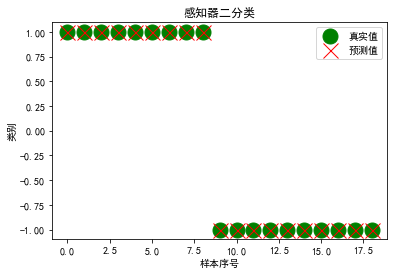

In [24]:
# 绘制真实值
plt.plot(test_y.values, "go", ms=15, label="真实值")
# 绘制预测值
plt.plot(result, "rx", ms=15, label="预测值")
plt.title("感知器二分类")
plt.xlabel("样本序号")
plt.ylabel("类别")
plt.legend()
plt.show()

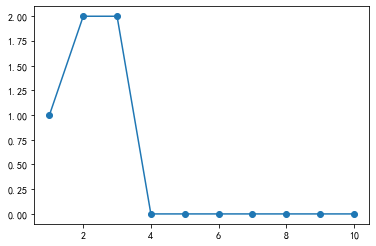

In [26]:
# 绘制目标函数的损失值
plt.plot(range(1, p.times + 1), p.loss_, "o-")